In [67]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img, img_to_array # type: ignore

In [68]:
# load model
model = tf.keras.models.load_model(filepath='./models/license_detection.keras')

In [69]:
path = './test_images/N44.jpeg'
img = load_img(path)
img = np.array(img,dtype=np.uint8) # 8 bit array (0,255)
img1 = load_img(path,target_size=(224,224))
img1_arr_224 = img_to_array(img1)/255.0  # convert into array and get the normalized output

In [70]:
# size of the orginal image
h,w,d = img.shape

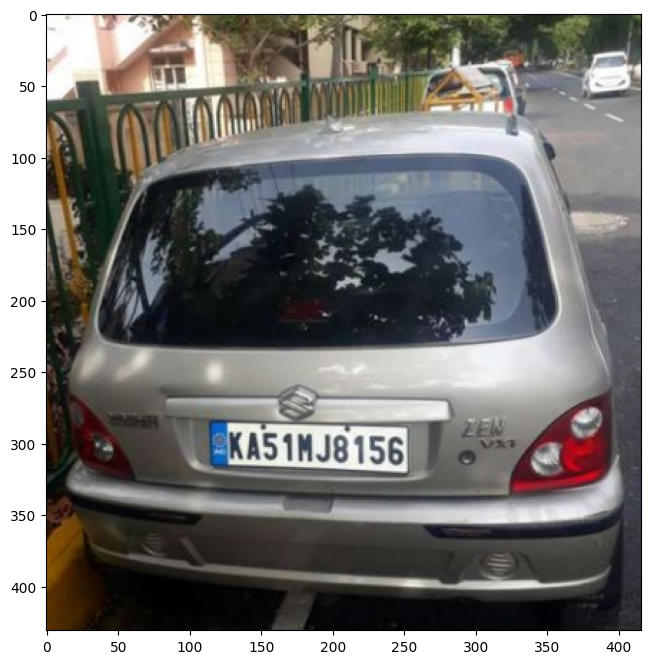

In [71]:
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [72]:
test_arr = img1_arr_224.reshape(1,224,224,3)

In [73]:
# make predictions
license_coords = model.predict(test_arr)
license_coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.27176315, 0.61870486, 0.6527722 , 0.74636865]], dtype=float32)

In [74]:
# Denormalize
denorm_matrix = np.array([w,w,h,h])

license_coords = license_coords * denorm_matrix
license_coords = license_coords.astype(np.int32)
license_coords

array([[113, 257, 281, 321]], dtype=int32)

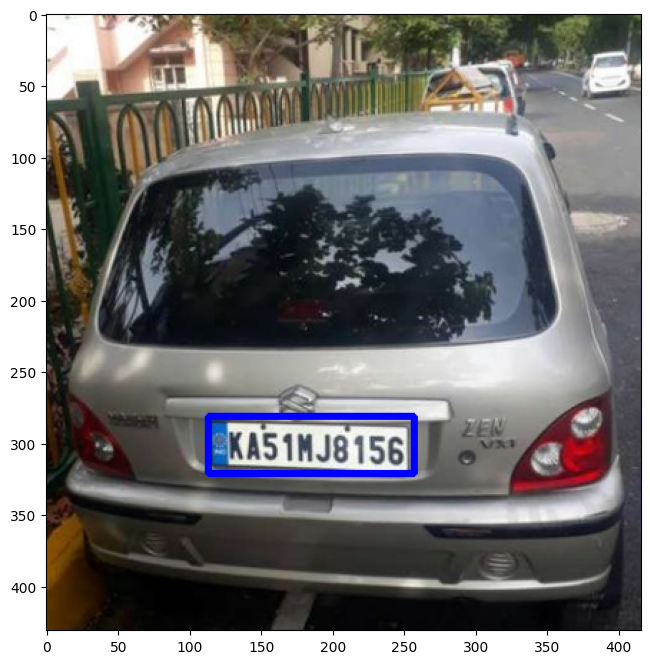

In [75]:
# Bounding boxes
xmin, xmax, ymin, ymax = license_coords[0]

p1 = (xmin,ymin)
p2 = (xmax,ymax)

cv2.rectangle(img,p1,p2,color=(0,0,255),thickness=3)

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

Create a pipeline for the model

In [76]:
def license_detection(path):
    # read image
    img = load_img(path) # PIL object
    img = np.array(img,dtype=np.uint8) # 8 bit array (0,255)
    img1 = load_img(path,target_size=(224,224))
    
    # data preprocessing
    img_arr_224 = img_to_array(img1)/255.0  # convert into array and get the normalized output
    h,w,d = img.shape
    test_arr = img_arr_224.reshape(1,224,224,3)
    
    # make predictions
    license_coords = model.predict(test_arr)
    
    # denormalize the values
    denorm = np.array([w,w,h,h])
    license_coords = license_coords * denorm
    license_coords = license_coords.astype(np.int32)
    
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = license_coords[0]
    p1 =(xmin,ymin)
    p2 =(xmax,ymax)
    cv2.rectangle(img,p1,p2,(0,0,255),3)
    
    return img, license_coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


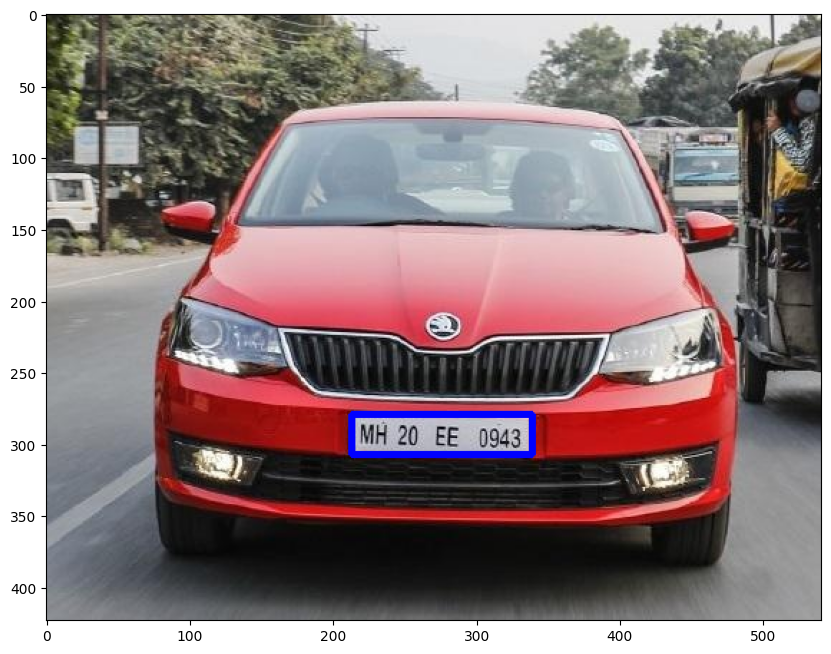

In [79]:
path = './test_images/N207.jpeg'

img, license_coords = license_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()